In [1]:
import numpy as np
import itertools as it
import random
import time
import matplotlib.pyplot as plt

# Algorithms

class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def get_weights(self):
    return self.weights

  def solve_knapsack_brute_force(self):
    permutations = list(it.product(range(2), repeat=len(self.weights)))
    max_profit = 0
    outcome = None
    for i in range(len(permutations)):
      current_weight = 0
      current_profit = 0
      for j in range(len(self.weights)):
        if permutations[i][j]:
          current_weight += self.weights[j]
          current_profit += self.profits[j]
      if current_profit >= max_profit and current_weight <= self.capacity:
        outcome = permutations[i]
        max_profit = current_profit
    return (max_profit, outcome)

  def solve_knapsack_pw_ratio(self):
    profit_ratios = []
    for i in range(len(self.weights)):
      profit_ratios.append(((self.profits[i] / self.weights[i]), i))
    profit_ratios.sort()
    profit_ratios.reverse()
    current_weight = 0
    current_profit = 0
    outcome = [0 for i in range(len(self.weights))]
    for i in range(len(profit_ratios)):
      if (current_weight + self.weights[profit_ratios[i][1]]) > self.capacity:
        break
      else:
        current_weight += self.weights[profit_ratios[i][1]]
        current_profit += self.profits[profit_ratios[i][1]]
        outcome[profit_ratios[i][1]] = 1
    return (current_profit, outcome)


In [2]:
# Plotter

def brute_force_plot(iters, profits, weights, capacity):
    times_brute = []
    elem_nums = []
    for i in range(iters):
        weights = np.append(weights, np.array([random.randint(1, 20)]))
        profits = np.append(profits, np.array([random.randint(1, 20)]))
        knap = KnapSack(profits, weights, capacity)
        start_time = time.time()
        knap.solve_knapsack_brute_force()
        times_brute.append(time.time() - start_time)
        elem_nums.append(len(knap.get_weights()))
    plt.plot(elem_nums, times_brute)
    plt.xlabel('iterations')
    plt.ylabel('time [s]')
    plt.show()

def comparison_plot(iters, profits, weights, capacity):
    times_brute = []
    times_heur = []
    elem_nums = []
    for i in range(iters):
        weights = np.append(weights, np.array([random.randint(1, 20)]))
        profits = np.append(profits, np.array([random.randint(1, 20)]))
        knap = KnapSack(profits, weights, capacity)
        start_time = time.time()
        knap.solve_knapsack_brute_force()
        times_brute.append(time.time() - start_time)
        start_time = time.time()
        knap.solve_knapsack_pw_ratio()
        times_heur.append(time.time() - start_time)
        elem_nums.append(len(knap.get_weights()))
    plt.plot(elem_nums, times_brute)
    plt.plot(elem_nums, times_heur)
    plt.xlabel('iterations')
    plt.ylabel('time [s]')
    plt.show()

(17, (0, 1, 1, 0))
(14, [0, 1, 0, 1])


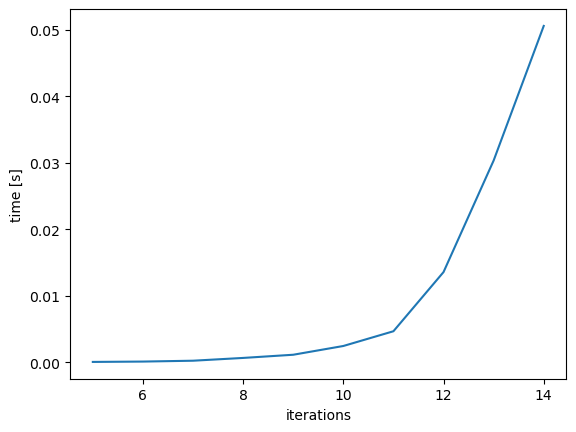

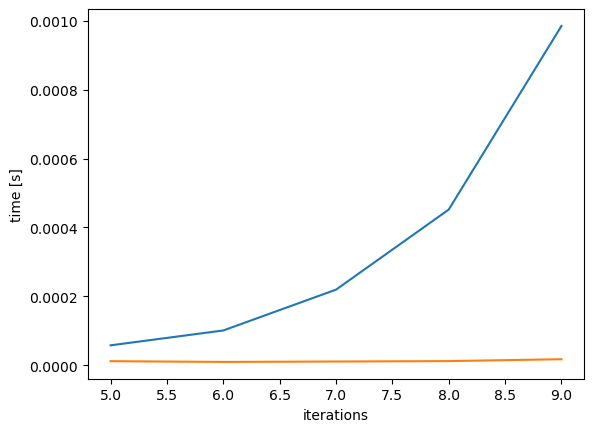

In [5]:
# Plot

weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

knap = KnapSack(profits, weights, capacity)
print(knap.solve_knapsack_brute_force())
print(knap.solve_knapsack_pw_ratio())

capacity_plot = 45
brute_force_plot(15, profits, weights, capacity_plot)
comparison_plot(5, profits, weights, capacity_plot)